<a href="https://colab.research.google.com/github/sharminnipu/US_Accident_Data_Analysis/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis(2016 - 2020)

TODO - talk about EDA

TODO - talk about the datatset(source,what it contains,how it will be usefull)
   - Kaggle
   - information about accidents
   - can use useful to prevent accidents
   - mention that this does not containt data about New York.

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sharminnipu
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:01<00:00, 82.3MB/s]


In [ ]:
data_filename='/content/us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preparations & Data Cleaning
1. Loading the file using Pandas
2. Look at some information about the data & columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df.columns)

47

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per columns

In [ ]:
df.isna().sum().sort_values(ascending=False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
Sunrise_Sunset                83
Civil_Twilight                83
Nautical_Twilight             83
Astronomical_Twilight         83
City                          83
Country                        0
Give_Way                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout                     0
Railway   

In [ ]:
missing_percentages=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages


Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

In [ ]:
#only missing values cloumn show me
missing_percentages[missing_percentages!=0]

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
dtype: float64

In [ ]:
type(missing_percentages)

pandas.core.series.Series

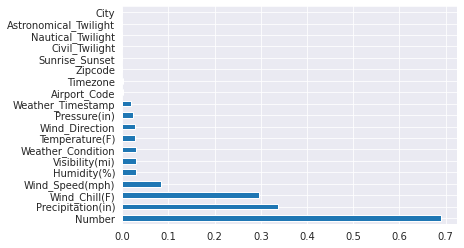

In [ ]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

From the graph we can understand that there is most missing values columns in number which is 70% and lowest missing values columns in city,Astronomical twilight,Nautical twilight,civil twilight, sunrise sunset,zipcode timezone,and airport code which is 0% percentages.

## Remove columns that we don't want to use.

## Exploratory Analysis and Visulization
 Coulmns we'll analyze:
 1. City
 2. State
 3. Start_Time
 4. Start_Lat,Start_Lng


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Analysis City

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [ ]:
cities=df.City.unique()
len(cities)

10658

In [ ]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

In [ ]:
cities_by_accidents[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

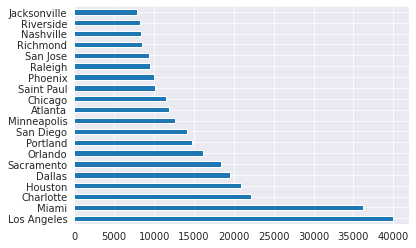

In [ ]:
cities_by_accidents[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

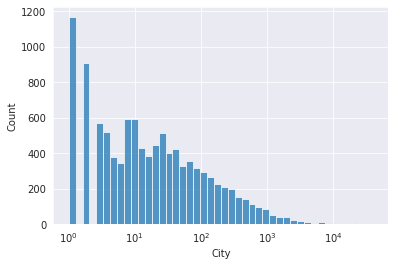

In [ ]:
sns.histplot(cities_by_accidents,log_scale=True)

In [ ]:
cities_by_accidents[cities_by_accidents==1]

South Paris                     1
Aberdeen Proving Ground         1
Rebecca                         1
Hiltons                         1
Jeanerette                      1
                               ..
Manzanita                       1
West Brooklyn                   1
Garfield Heights                1
Belding                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1167, dtype: int64

In [ ]:
high_accident_cities=cities_by_accidents[cities_by_accidents>=1000]
low_accident_cities=cities_by_accidents[cities_by_accidents<1000]

In [ ]:
len(high_accident_cities)/len(cities)

0.023550384687558643

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


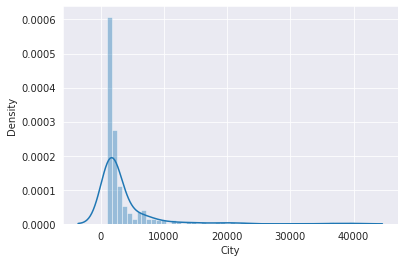

In [ ]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


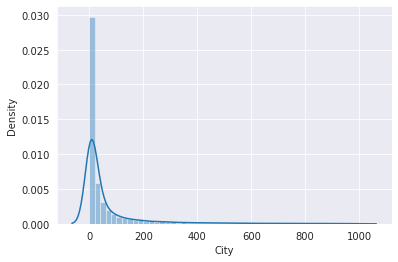

In [ ]:
sns.distplot(low_accident_cities)

In [ ]:
#check value have in column of state
'NY' in df.State

False

## Analysis State

In [ ]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
1516059    CA
1516060    CA
1516061    CA
1516062    CA
1516063    CA
Name: State, Length: 1516064, dtype: object

In [ ]:
states_by_accidents=df.State.value_counts()
states_by_accidents

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

In [ ]:
states_by_accidents[:5]

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: State, dtype: int64

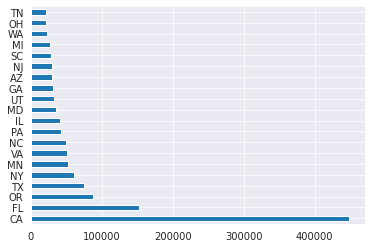

In [ ]:
states_by_accidents[:20].plot(kind='barh')

In [ ]:
high_accident_state=states_by_accidents[states_by_accidents>=100000]
low_accident_state=states_by_accidents[states_by_accidents<100000]

In [ ]:
high_accident_state


CA    448833
FL    153007
Name: State, dtype: int64

In [ ]:
low_accident_state

OR    87484
TX    75142
NY    60974
MN    52345
VA    51198
NC    50159
PA    42844
IL    41709
MD    35320
UT    33218
GA    31111
AZ    30185
NJ    29850
SC    28090
MI    27775
WA    22999
OH    22044
TN    21874
CO    19809
LA    19250
MO    16949
CT    15194
IN    11736
AL     9375
WI     7919
MA     6121
KY     5671
OK     5592
KS     5146
IA     4780
AR     4373
ID     4061
NH     3826
DC     3788
RI     3766
NV     3681
MT     3306
WV     3242
MS     2790
DE     2331
ME     2202
NE     2178
NM     1467
ND      455
VT      352
WY      330
SD      213
Name: State, dtype: int64

### Analysis Start Time

In [ ]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [ ]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

- Figure out how to show percentages

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


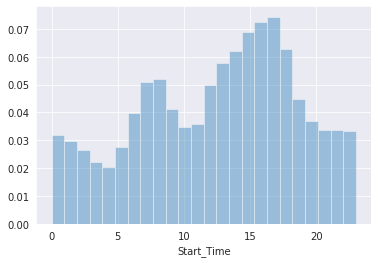

In [ ]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

- A high percentage of accidents occur between 12pm to 7pm(probaply people in a hurry to get to back home or reach to working place).
- Next highest percentage of accident is 6am to 10 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


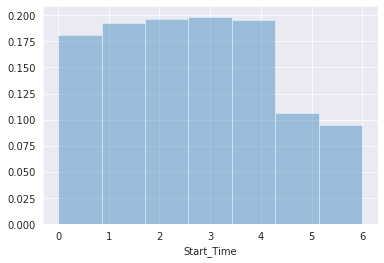

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

Is the distribution of accidents by hour the same on weekends as an weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


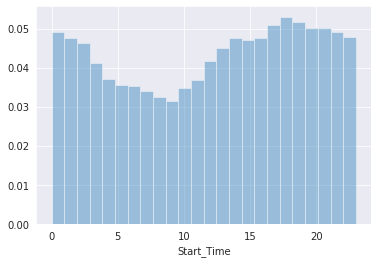

In [ ]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


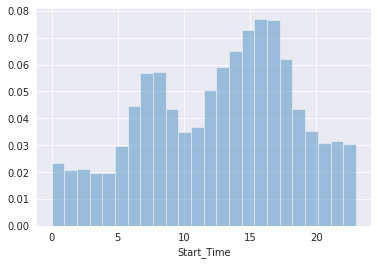

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

On sunday,the peak occurs between 12am and 6pm,unlike weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


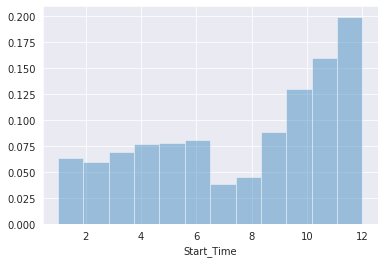

In [ ]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

Graph says that On December month accident occurred mostly which is winter season.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


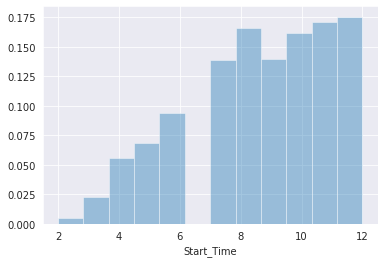

In [ ]:
df_2019=df[df_Start_Time.dt.year==2016]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

Can we explain the month wise trends of accidents?
- Much data is missing in 2016 and 2020.


### Analysis Start_Latitude & Longitude

In [ ]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [ ]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 *len(df))) 

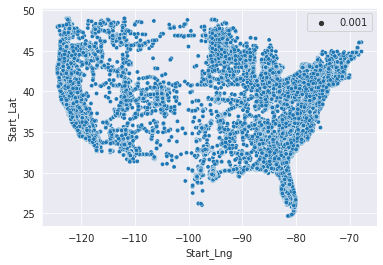

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

In [ ]:
import folium

In [ ]:
lat,lng=df.Start_Lat[0],df.Start_Lng[0]
lat,lng

(40.10891, -83.09286)

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df=df.sample(int(0.01 *len(df)))
lat_lng_pair=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [ ]:
map=folium.Map()
HeatMap(lat_lng_pair).add_to(map)
map

## Ask &  answer Questions
1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents?How about per capita?
3. Does New York show up in thr data?If yes,is the count lower if this most populated city.
4. Among the top 100 cities in number of accidents,which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? **ANSWER**
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year(decreasing/increasing?)


## Summary and Conclusion


Insights:
- No data for New York
- California and Florida are highest accidents occurred in state
- The number of accidents per city descreases exponentially.
- Less than 2% of cities have more than 1000 yearly accidents.
- Over 1100 cities have repoted just one accident(need to investingate)